In [1]:
# import dependencies
import pandas as pd
import numpy as np
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import matthews_corrcoef
%matplotlib inline


In [2]:
# read data 
data = pd.read_csv('P.data')

#print the first 5 rows of the data
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


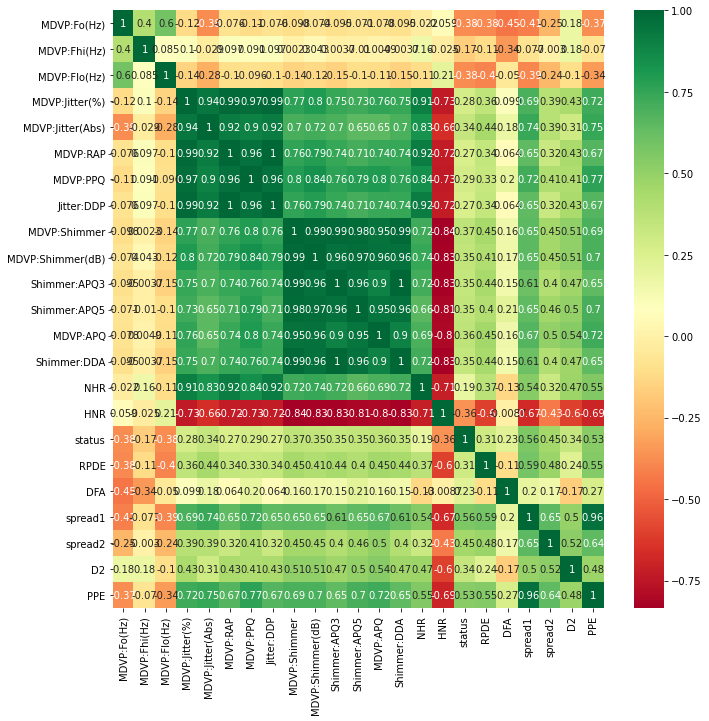

In [3]:
# segregatting features and labels
features = data.loc[:, data.columns != 'status'].values[:, 1:]
labels = data.loc[:, 'status'].values

# Correlation matrix
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(11,11))

#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [4]:
# fit_transform is used on training data to scale the data and also learn the scaling parameters

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1, 1))

X = scaler.fit_transform(features)
Y = labels

#X = scaler.fit_transform(features)
#Y = scaler.fit_transform(labels)

# Classification-KNN

In [5]:
# Segregating Train and test data for the model

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import matthews_corrcoef

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=4)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)

In [7]:
# KNN Accuracy classification score 
A1=metrics.accuracy_score(y_test, yhat)

# Matthew Correlation Coefficient
B1=matthews_corrcoef(y_test, yhat) 
print("KNN Accuracy: ", A1)
print("MCC: ",B1)

KNN Accuracy:  0.9322033898305084
MCC:  0.8247747100021534


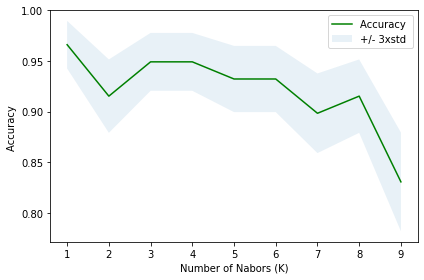

In [8]:
# calculating mean and standard accuracy
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [9]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, yhat)

In [10]:
cm

array([[ 7,  9],
       [ 1, 42]], dtype=int64)

# Decision Tree

In [11]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, Y, test_size=0.14, random_state=7)

In [12]:
#Decision tree classification
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
DT.fit(X_trainset,y_trainset)
y_tree = DT.predict(X_testset)

In [13]:
# Decision tree accuracy
A2=metrics.accuracy_score(y_testset, y_tree)

# Matthew Correlation Coefficient
B2=matthews_corrcoef(y_testset, y_tree) 
print("Decision Tree Accuracy: ", A2)
print("MCC: ",B2)

Decision Tree Accuracy:  0.8214285714285714
MCC:  0.6492207662311682


In [14]:
#Confusion matix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_testset, y_tree)

In [15]:
cm

array([[ 6,  0],
       [ 5, 17]], dtype=int64)

# LR

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.098, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)

In [17]:
# Logistic accuracy score
A3=metrics.accuracy_score(y_test, yhat)

# Matthew Correlation Coefficient
B3=matthews_corrcoef(y_test, yhat) 
print("Logistic's Accuracy: ", A3)

Logistic's Accuracy:  0.7966101694915254


# XGBoost

In [19]:
# Importing XGBoost 
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training the train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.14, random_state=7)

In [20]:
# XBClassifier  
model = XGBClassifier()
model.fit(X_train, Y_train)

C:\Users\hp\anaconda3\envs\hello-tf\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:15:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [21]:
Y_hat = [round(yhat) for yhat in model.predict(X_test)]

# accuracy score
A4=accuracy_score(Y_test, Y_hat)

# Matthew Correlation Coefficient
B4=matthews_corrcoef(Y_test, Y_hat) 
print("accuracy ",accuracy_score(Y_test, Y_hat))
print("MCC ",B4)

accuracy  0.9285714285714286
MCC  0.7817359599705717


In [22]:
# dataframe 
df2=pd.DataFrame({'Algorithm':['KNN','Decision Tree','Logistic Regression','XGBoost'],'Accuracy':[A1,A2,A3,A4],'MCC':[B1,B2,B3,B4]})
df2

,Algorithm,Accuracy,MCC
0,KNN,0.932203,0.824775
1,Decision Tree,0.821429,0.649221
2,Logistic Regression,0.796610,0.425447
3,XGBoost,0.928571,0.781736


Text(0.5, 1.0, 'Bar Chart for classifier choice')

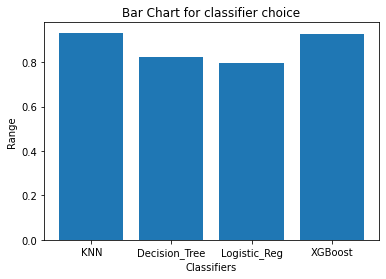

In [23]:
# plotting a chat bar for KNN, Decision treem Logistic regression, XGBoost
x = ['KNN', 'Decision_Tree', 'Logistic_Reg','XGBoost']
y = [A1,A2,A3,A4]
# create bar chart

# show line plot
plt.show()
plt.xlabel('Classifiers')
plt.ylabel('Range')
plt.bar(x, y)
plt.title('Bar Chart for classifier choice')